# Market Basket Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

### Retriving the item_list dataframe which we stored in the csv file in the previous notebook

In [2]:
items_per_transaction = pd.read_csv("./datasets/Items_per_Transaction.csv")

items_per_transaction

,InvoiceNo,Description
0,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
1,536403,HAND WARMER BIRD DESIGN
2,536527,"SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS..."
3,536840,"JAM MAKING SET PRINTED,JAM JAR WITH PINK LID,J..."
4,536852,"PICTURE DOMINOES,MINI JIGSAW SPACEBOY,MINI JIG..."
...,...,...
1111,581494,"RABBIT NIGHT LIGHT,STRAWBERRY LUNCH BOX WITH C..."
1112,581570,"CHRISTMAS CRAFT TREE TOP ANGEL,PINK OWL SOFT T..."
1113,581574,"ROUND SNACK BOXES SET OF4 WOODLAND,ROUND SNACK..."
1114,581578,"SET/10 BLUE POLKADOT PARTY CANDLES,SET/10 PINK..."


### Creating a list where every transaction per InvoiceNo is inside another list 

In [3]:
item_list = [item.split(",") for item in items_per_transaction.Description]

item_list

[['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET',
  'STARS GIFT TAPE',
  'INFLATABLE POLITICAL GLOBE',
  'VINTAGE HEADS AND TAILS CARD GAME',
  'SET/2 RED RETROSPOT TEA TOWELS',
  'ROUND SNACK BOXES SET OF4 WOODLAND',
  'SPACEBOY LUNCH BOX',
  'LUNCH BOX I LOVE LONDON',
  'CIRCUS PARADE LUNCH BOX',
  'CHARLOTTE BAG DOLLY GIRL DESIGN',
  'RED TOADSTOOL LED NIGHT LIGHT',
  'SET 2 TEA TOWELS I LOVE LONDON',
  'VINTAGE SEASIDE JIGSAW PUZZLES',
  'MINI JIGSAW CIRCUS PARADE',
  'MINI JIGSAW SPACEBOY',
  'MINI PAINT SET VINTAGE'],
 ['HAND WARMER BIRD DESIGN'],
 ['SET OF 6 T-LIGHTS SANTA',
  'ROTATING SILVER ANGELS T-LIGHT HLDR',
  'MULTI COLOUR SILVER T-LIGHT HOLDER',
  '5 HOOK HANGER MAGIC TOADSTOOL',
  '3 HOOK HANGER MAGIC GARDEN',
  '5 HOOK HANGER RED MAGIC TOADSTOOL',
  'ASSORTED COLOUR LIZARD SUCTION HOOK',
  'JUMBO BAG WOODLAND ANIMALS',
  'JUMBO BAG OWLS',
  'HOT WATER BOTTLE BABUSHKA',
  'HOMEMADE JAM SCEN

http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

In [4]:
te = TransactionEncoder()

te_array = te.fit(item_list).transform(item_list)

te_array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

### Creating a Dataframe using the column in transactionencoder and the rows from transactionencoder array

In [5]:
item_df = pd.DataFrame(te_array, columns = te.columns_)

item_df

,,1 HANGER,BACK DOOR,BILLBOARD FONTS DESIGN,BIRTHDAY CARD,BREAKFAST IN BED,CHOCOLATE SPOTS,DOUGHNUTS,NEW ENGLAND,OVERCROWDED POOL.,...,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1112,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1113,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1114,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
item_df[""].value_counts()

False    1092
True       24
Name: , dtype: int64

### Removing the blank column

In [7]:
item_df = item_df.drop("", axis = 1)

item_df.shape

(1116, 2368)

In [8]:
spaceboy_box_df = item_df[item_df["SPACEBOY LUNCH BOX"] == True]

spaceboy_box_df[["SPACEBOY LUNCH BOX"]]

,SPACEBOY LUNCH BOX
0,True
14,True
48,True
57,True
71,True
...,...
1052,True
1083,True
1106,True
1107,True


In [9]:
dolly_box_df = item_df[item_df["DOLLY GIRL LUNCH BOX"] == True]

dolly_box_df[["DOLLY GIRL LUNCH BOX"]]

,DOLLY GIRL LUNCH BOX
27,True
48,True
74,True
87,True
96,True
...,...
993,True
997,True
1017,True
1029,True


In [10]:
spaceboy_dolly = item_df[(item_df["SPACEBOY LUNCH BOX"] == True) & 
                         (item_df["DOLLY GIRL LUNCH BOX"] == True)]

spaceboy_dolly[["SPACEBOY LUNCH BOX", "DOLLY GIRL LUNCH BOX"]]

,SPACEBOY LUNCH BOX,DOLLY GIRL LUNCH BOX
48,True,True
74,True,True
87,True,True
96,True,True
105,True,True
...,...,...
993,True,True
997,True,True
1017,True,True
1029,True,True


In [11]:
pd.set_option('display.max_colwidth', None)

In [12]:
frequent_items = apriori(item_df, min_support = 0.1, use_colnames = True)

frequent_items

,support,itemsets
0,0.103047,(PACK OF 72 RETROSPOT CAKE CASES)
1,0.129032,(PLASTERS IN TIN CIRCUS PARADE)
2,0.115591,(PLASTERS IN TIN SPACEBOY)
3,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
4,0.103943,(RABBIT NIGHT LIGHT)
5,0.128136,(RED TOADSTOOL LED NIGHT LIGHT)
6,0.141577,(REGENCY CAKESTAND 3 TIER)
7,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
8,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
9,0.142473,(SPACEBOY LUNCH BOX)


In [13]:
frequent_items.sort_values("support", ascending = False)

,support,itemsets
8,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
3,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
9,0.142473,(SPACEBOY LUNCH BOX)
6,0.141577,(REGENCY CAKESTAND 3 TIER)
7,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
1,0.129032,(PLASTERS IN TIN CIRCUS PARADE)
5,0.128136,(RED TOADSTOOL LED NIGHT LIGHT)
2,0.115591,(PLASTERS IN TIN SPACEBOY)
11,0.107527,"(ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNACK BOXES SET OF 4 FRUITS)"
10,0.104839,(WOODLAND CHARLOTTE BAG)


In [14]:
frequent_items = apriori(item_df, min_support = 0.05, use_colnames = True)

frequent_items.sort_values("support", ascending = False)

,support,itemsets
43,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
52,0.142473,(SPACEBOY LUNCH BOX)
32,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
39,0.141577,(REGENCY CAKESTAND 3 TIER)
42,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
...,...,...
16,0.051075,(JAM MAKING SET WITH JARS)
51,0.050179,(SPACEBOY CHILDRENS BOWL)
44,0.050179,(SET OF 2 TEA TOWELS APPLE AND PEARS)
55,0.050179,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED)"


In [15]:
frequent_items = apriori(item_df, min_support = 0.02, use_colnames = True)

frequent_items.sort_values("support", ascending = False)

,support,itemsets
197,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
247,0.142473,(SPACEBOY LUNCH BOX)
154,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
183,0.141577,(REGENCY CAKESTAND 3 TIER)
196,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
...,...,...
301,0.020609,"(DOLLY GIRL LUNCH BOX, CHARLOTTE BAG DOLLY GIRL DESIGN)"
296,0.020609,"(PLASTERS IN TIN WOODLAND ANIMALS, CHARLOTTE BAG APPLES DESIGN)"
285,0.020609,"(PLASTERS IN TIN SPACEBOY, ALARM CLOCK BAKELIKE RED)"
415,0.020609,"(RED RETROSPOT PICNIC BAG, LUNCH BAG RED RETROSPOT)"


In [16]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.10)

assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415
1,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,0.076338,3.366487


In [17]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.05)

assoc_rules.sample(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.129032,0.142473,0.076165,0.590278,4.143082,0.057781,2.092947
34,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETROSPOT PAPER NAPKINS)",(SET/6 RED SPOTTY PAPER PLATES),0.051971,0.077957,0.050179,0.965517,12.385256,0.046128,26.739247
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.069892,0.065412,0.050179,0.717949,10.975764,0.045607,3.313539
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.065412,0.069892,0.050179,0.767123,10.975764,0.045607,3.993991
36,(SET/6 RED SPOTTY PAPER CUPS),"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RETROSPOT PAPER NAPKINS)",0.078853,0.054659,0.050179,0.636364,11.642325,0.045869,2.599686


### If ascending = False it will sort in the descending order

In [18]:
assoc_rules.sort_values("support", ascending = False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,0.076338,3.366487
20,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415
23,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.142473,0.223118,0.077957,0.547170,2.452376,0.046169,1.715614
22,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,0.046169,1.318051
13,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.142473,0.115591,0.077061,0.540881,4.679245,0.060592,1.926315


In [19]:
assoc_rules = association_rules(frequent_items, metric = "confidence", min_threshold = 1)

assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.0,26.571429,0.026732,inf
1,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.0,28.615385,0.024213,inf
2,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.021505,0.077957,0.021505,1.0,12.827586,0.019829,inf
3,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.0,26.571429,0.023283,inf
4,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.0,28.615385,0.023348,inf


In [20]:
assoc_rules = association_rules(frequent_items, metric = "confidence", min_threshold = 0.9)

assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.034946,0.037634,0.032258,0.923077,24.527473,0.030943,12.510753
1,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.022401,0.041219,0.021505,0.960000,23.290435,0.020582,23.969534
2,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,0.026732,inf
3,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.025090,0.903226,24.000000,0.024044,9.944444
4,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf
5,"(ROUND SNACK BOXES SET OF4 WOODLAND, DOLLY GIRL CHILDRENS BOWL)",(SPACEBOY CHILDRENS BOWL),0.021505,0.050179,0.020609,0.958333,19.098214,0.019530,22.795699
6,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(SPACEBOY CHILDRENS BOWL),0.025090,0.050179,0.024194,0.964286,19.216837,0.022935,26.594982
7,"(PLASTERS IN TIN WOODLAND ANIMALS, LUNCH BAG SPACEBOY DESIGN)",(PLASTERS IN TIN SPACEBOY),0.027778,0.115591,0.025986,0.935484,8.093023,0.022775,13.708333
8,"(PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKULL PAPER CUPS)",(PACK OF 6 SKULL PAPER PLATES),0.027778,0.035842,0.025090,0.903226,25.200000,0.024094,9.962963
9,"(PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKULL PAPER PLATES)",(PACK OF 6 SKULL PAPER CUPS),0.027778,0.038530,0.025090,0.903226,23.441860,0.024019,9.935185


In [21]:
assoc_rules = association_rules(frequent_items, metric = "lift", min_threshold = 28)

assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf
1,(DOLLY GIRL CHILDRENS CUP),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.034946,0.025090,0.025090,0.717949,28.615385,0.024213,3.456500
2,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE BEDROOM)",(POPPY'S PLAYHOUSE LIVINGROOM),0.027778,0.025090,0.020609,0.741935,29.571429,0.019912,3.777778
3,(POPPY'S PLAYHOUSE LIVINGROOM),"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE BEDROOM)",0.025090,0.027778,0.020609,0.821429,29.571429,0.019912,5.444444
4,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,0.023348,inf
5,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)","(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",0.025090,0.027778,0.024194,0.964286,34.714286,0.023497,27.222222
6,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)","(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.027778,0.025090,0.024194,0.870968,34.714286,0.023497,7.555556
7,(DOLLY GIRL CHILDRENS CUP),"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",0.034946,0.024194,0.024194,0.692308,28.615385,0.023348,3.171371


In [22]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.02)

assoc_rules.shape

(1188, 9)

In [23]:
assoc_rules[(assoc_rules["confidence"] >= 0.9) & (assoc_rules["lift"] >= 25)] \
    .sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
680,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,0.026732,inf
685,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf
1104,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.000000,26.571429,0.023283,inf
1106,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,0.023348,inf
1110,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)","(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",0.025090,0.027778,0.024194,0.964286,34.714286,0.023497,27.222222
871,"(PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER PLATES)",(PACK OF 6 SKULL PAPER PLATES),0.022401,0.035842,0.021505,0.960000,26.784000,0.020702,24.103943
1040,"(POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE LIVINGROOM)",(POPPY'S PLAYHOUSE KITCHEN),0.021505,0.037634,0.020609,0.958333,25.464286,0.019800,23.096774
1039,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE LIVINGROOM)",(POPPY'S PLAYHOUSE BEDROOM),0.022401,0.034946,0.020609,0.920000,26.326154,0.019826,12.063172
864,"(PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKULL PAPER CUPS)",(PACK OF 6 SKULL PAPER PLATES),0.027778,0.035842,0.025090,0.903226,25.200000,0.024094,9.962963


* Visualizing where the items for support and confidence we can see that there are some items which are having low support and confidence and there are some items the are having low support but confidence and there are some items having high support and confidence and is categorizing according to lift 
* Also high lift have a relatively low support

https://github.com/kimfetti/Videos/blob/master/Seaborn/08_scatterplot.ipynb

https://www.researchgate.net/publication/228961197_Visualizing_Association_Rules_Introduction_to_the_R-extension_Package_arulesViz

Text(0, 0.5, 'Confidence')

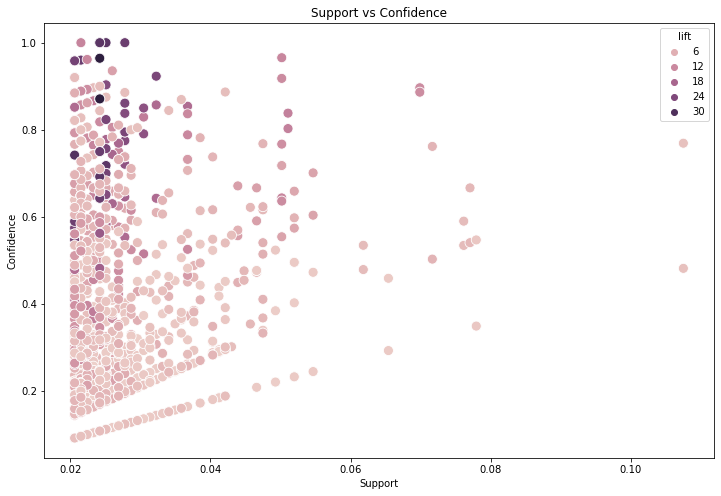

In [24]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = assoc_rules["support"], 
                y = assoc_rules["confidence"], 
                hue = assoc_rules["lift"], s = 100)
        
plt.title("Support vs Confidence")

plt.xlabel("Support")
plt.ylabel("Confidence")

In [25]:
type(assoc_rules["antecedents"][0])

frozenset

### Showing we can filter on the specific itemset and the itemset is itself frozenset as shown above

In [26]:
assoc_rules[assoc_rules["antecedents"] == {"SPACEBOY CHILDRENS BOWL"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
129,(SPACEBOY CHILDRENS BOWL),(DOLLY GIRL CHILDRENS BOWL),0.050179,0.037634,0.032258,0.642857,17.081633,0.030370,2.694624
135,(SPACEBOY CHILDRENS BOWL),(DOLLY GIRL CHILDRENS CUP),0.050179,0.034946,0.027778,0.553571,15.840659,0.026024,2.161720
579,(SPACEBOY CHILDRENS BOWL),(ROUND SNACK BOXES SET OF4 WOODLAND),0.050179,0.223118,0.029570,0.589286,2.641136,0.018374,1.891538
613,(SPACEBOY CHILDRENS BOWL),(SPACEBOY CHILDRENS CUP),0.050179,0.043011,0.036738,0.732143,17.022321,0.034580,3.572760
683,(SPACEBOY CHILDRENS BOWL),"(DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.050179,0.032258,0.027778,0.553571,17.160714,0.026159,2.167742
694,(SPACEBOY CHILDRENS BOWL),"(ROUND SNACK BOXES SET OF4 WOODLAND, DOLLY GIRL CHILDRENS BOWL)",0.050179,0.021505,0.020609,0.410714,19.098214,0.019530,1.660476
700,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.050179,0.025090,0.024194,0.482143,19.216837,0.022935,1.882586
707,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",0.050179,0.027778,0.024194,0.482143,17.357143,0.022800,1.877395
1096,(SPACEBOY CHILDRENS BOWL),"(ROUND SNACK BOXES SET OF4 WOODLAND, SPACEBOY CHILDRENS CUP)",0.050179,0.024194,0.020609,0.410714,16.976190,0.019395,1.655914
1116,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.050179,0.025090,0.024194,0.482143,19.216837,0.022935,1.882586


In [27]:
assoc_rules[assoc_rules["antecedents"] == {"DOLLY GIRL CHILDRENS CUP", "SPACEBOY CHILDRENS CUP"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
684,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.025090,0.903226,24.000000,0.024044,9.944444
702,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",(SPACEBOY CHILDRENS BOWL),0.027778,0.050179,0.024194,0.870968,17.357143,0.022800,7.361111
1108,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)","(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS BOWL)",0.027778,0.032258,0.024194,0.870968,27.000000,0.023297,7.500000


In [28]:
assoc_rules[assoc_rules["consequents"] == {"ALARM CLOCK BAKELIKE RED"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.026882,0.069892,0.021505,0.800000,11.446154,0.019627,4.650538
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.065412,0.069892,0.050179,0.767123,10.975764,0.045607,3.993991
12,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE RED),0.028674,0.069892,0.022401,0.781250,11.177885,0.020397,4.251920
15,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.078853,0.069892,0.046595,0.590909,8.454545,0.041084,2.273596
26,(PLASTERS IN TIN SPACEBOY),(ALARM CLOCK BAKELIKE RED),0.115591,0.069892,0.020609,0.178295,2.550984,0.012530,1.131923
28,(ROUND SNACK BOXES SET OF4 WOODLAND),(ALARM CLOCK BAKELIKE RED),0.223118,0.069892,0.036738,0.164659,2.355885,0.021144,1.113446
31,(SPACEBOY LUNCH BOX),(ALARM CLOCK BAKELIKE RED),0.142473,0.069892,0.025090,0.176101,2.519594,0.015132,1.128909
625,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE PINK)",(ALARM CLOCK BAKELIKE RED),0.043907,0.069892,0.036738,0.836735,11.971743,0.033670,5.696909
636,"(ROUND SNACK BOXES SET OF4 WOODLAND, ALARM CLOCK BAKELIKE GREEN)",(ALARM CLOCK BAKELIKE RED),0.029570,0.069892,0.024194,0.818182,11.706294,0.022127,5.115591
643,"(ROUND SNACK BOXES SET OF4 WOODLAND, ALARM CLOCK BAKELIKE PINK)",(ALARM CLOCK BAKELIKE RED),0.032258,0.069892,0.024194,0.750000,10.730769,0.021939,3.720430


In [29]:
assoc_rules[assoc_rules["consequents"] == {"DOLLY GIRL CHILDRENS CUP", "DOLLY GIRL CHILDRENS BOWL"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
683,(SPACEBOY CHILDRENS BOWL),"(DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.050179,0.032258,0.027778,0.553571,17.160714,0.026159,2.167742
687,(SPACEBOY CHILDRENS CUP),"(DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.043011,0.032258,0.025090,0.583333,18.083333,0.023702,2.322581
1109,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)","(DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.036738,0.032258,0.024194,0.658537,20.414634,0.023008,2.834101


## Recommending Consequents for a Antecedents

In [30]:
frequent_items = apriori(item_df, min_support = 0.01, use_colnames = True)

frequent_items

,support,itemsets
0,0.013441,( BIRTHDAY CARD)
1,0.010753,( RETRO SPOT)
2,0.026882,(10 COLOUR SPACEBOY PEN)
3,0.017025,(12 PENCIL SMALL TUBE WOODLAND)
4,0.013441,(12 PENCILS SMALL TUBE RED RETROSPOT)
...,...,...
3541,0.016129,"(PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETROSPOT PAPER NAPKINS)"
3542,0.010753,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TIN STRONGMAN, PLASTERS IN TIN WOODLAND ANIMALS)"
3543,0.016129,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK BOXES SET OF 4 FRUITS)"
3544,0.012545,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TIN STRONGMAN, PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK BOXES SET OF 4 FRUITS)"


In [31]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.01)

assoc_rules.sort_values("support", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2970,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415
2971,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,0.076338,3.366487
3050,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,0.046169,1.318051
3051,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.142473,0.223118,0.077957,0.547170,2.452376,0.046169,1.715614
2451,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.142473,0.115591,0.077061,0.540881,4.679245,0.060592,1.926315
...,...,...,...,...,...,...,...,...,...
2799,(SET/6 RED SPOTTY PAPER CUPS),(RED RETROSPOT PLATE),0.078853,0.042115,0.010753,0.136364,3.237911,0.007432,1.109130
2800,(RED RETROSPOT PLATE),(SET/6 RED SPOTTY PAPER PLATES),0.042115,0.077957,0.010753,0.255319,3.275128,0.007470,1.238172
2801,(SET/6 RED SPOTTY PAPER PLATES),(RED RETROSPOT PLATE),0.077957,0.042115,0.010753,0.137931,3.275128,0.007470,1.111147
2802,(RED RETROSPOT PLATE),(SPACEBOY LUNCH BOX),0.042115,0.142473,0.010753,0.255319,1.792051,0.004752,1.151536


We know that ROUND SNACK BOXES SET OF4 WOODLAND is the most popular of the all items so we will see in antecedents column how many times ROUND SNACK BOXES SET OF4 WOODLAND is present

In [32]:
round_snack_boxes_antecedent = assoc_rules[assoc_rules["antecedents"] == {"ROUND SNACK BOXES SET OF4 WOODLAND"}]

round_snack_boxes_antecedent = round_snack_boxes_antecedent.sort_values("support", ascending = False).head(5)

round_snack_boxes_antecedent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2970,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415
3050,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,0.046169,1.318051
2572,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.223118,0.142473,0.065412,0.293173,2.057740,0.033624,1.213206
2478,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN SPACEBOY),0.223118,0.115591,0.054659,0.244980,2.119361,0.028869,1.171371
3078,(ROUND SNACK BOXES SET OF4 WOODLAND),(WOODLAND CHARLOTTE BAG),0.223118,0.104839,0.051971,0.232932,2.221810,0.028580,1.166990


Plotting the graph of the 5 most popular items that are recomended with ROUND SNACK BOXES SET OF4 WOODLAND

Text(0, 0.5, 'Recommended Items')

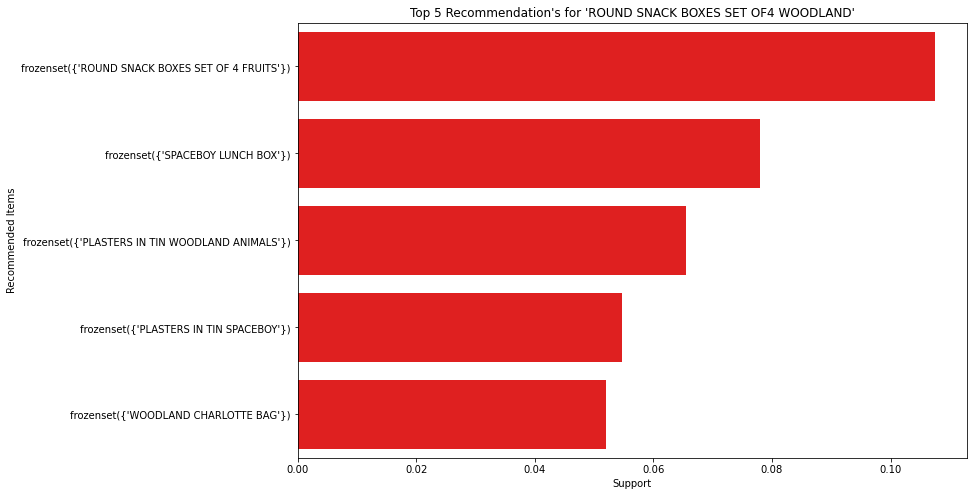

In [33]:
plt.figure(figsize = [12, 8])

x = sns.barplot(x = "support", y = "consequents", data = round_snack_boxes_antecedent, color = "red")

plt.title("Top 5 Recommendation's for 'ROUND SNACK BOXES SET OF4 WOODLAND'")
plt.xlabel("Support")
plt.ylabel("Recommended Items")